# House Prices: Advanced Regression Techniques
## A second jog.

Import modules.

In [78]:
import feather
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

Read in training data using pandas.

In [79]:
PATH = "input/"

In [80]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False)

Function from fastai lesson 1 which allows up to 1000 columns to be displayed. 

In [81]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [82]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


Need to minimise the root mean squared logarithmic error. 

In [83]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

The categorical variables are currently stored as strings which doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [84]:
train_cats(df_raw)

In [85]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [86]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/house_prices-raw')

Lets save 1/2 the data for validation (`n_valid = 730`).

In [87]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()
n_valid = 730
n_trn = len(df_raw)-n_valid # 730 for this competition.

In [205]:
import feather
df_raw = feather.read_dataframe('tmp/house_prices-raw')

In [206]:
df_raw.shape

(1460, 81)

In [207]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [208]:
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((730, 83), (730,), (730, 83))

Define functions to print out score.

In [209]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    print('##################################################')
    print('Results')
    print('log Root Mean Square Error Training Set: {:0.3}'.format(rmse(m.predict(X_train), y_train)))
    print('log Root Mean Square Error Validation Set: {:0.3}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 Training Set: {:0.3}'.format(m.score(X_train, y_train)))
    print('R^2 Validation Set: {:0.3}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('oob_score: {:0.3}'.format(m.oob_score_))
    print('##################################################')

In [215]:
m = RandomForestRegressor(n_jobs=-1, n_estimators = 50, max_features = 0.5,  oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 125 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0607
log Root Mean Square Error Validation Set: 0.14
R^2 Training Set: 0.979
R^2 Validation Set: 0.866
oob_score: 0.849
##################################################


# Feature Importance
Feature importance compares the prediction score calculated for each independent variable, when its resepective column is scrambled. By comparing this to the original prediction, the magnitude of the effect of scrambling the column can be estimated, which is a good proxy for the importance of the variable in the model.  Now we have an initial model, let us run feature importance and check which parameters we need to learn more about. 

In [216]:
fi = rf_feat_importance(m, df); fi [:30]

,cols,imp
17,OverallQual,0.340148
46,GrLivArea,0.153380
19,YearBuilt,0.103625
38,TotalBsmtSF,0.041242
27,ExterQual,0.036190
62,GarageArea,0.033666
43,1stFlrSF,0.031305
61,GarageCars,0.028129
34,BsmtFinSF1,0.021068
4,LotArea,0.015243


In [95]:
0.529/0.0985

5.370558375634518

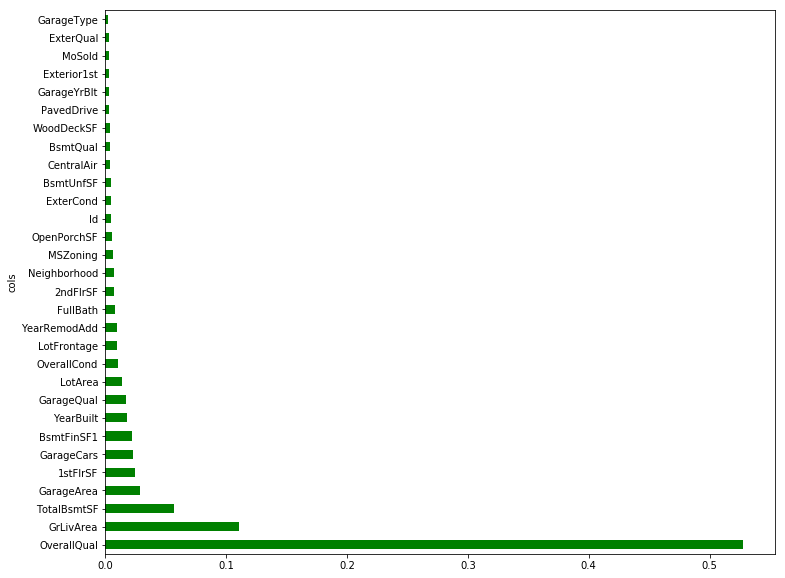

In [96]:
fi[:30].plot('cols', 'imp', 'barh', figsize = (12,10), legend = False, color='g')

It appears that `OverallQual` is five times more important than the next most important independent variable, `GrLivArea`.  

`OverallQual` Rates the overall material and finish of the house. 

   10   Very Excellent  
   9    Excellent  
   8    Very Good  
   7    Good  
   6    Above Average  
   5    Average  
   4    Below Average  
   3    Fair  
   2    Poor  
   1    Very Poor  
   
`GrLivArea` Above grade (ground) living area square feet.

Lets make a dataset which only includes independent variables with a feature importance greater than 0.005.

In [218]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

24

In [219]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

And retrain our model.

In [235]:
m = RandomForestRegressor(n_estimators = 50, max_features = 0.5, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 124 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0564
log Root Mean Square Error Validation Set: 0.138
R^2 Training Set: 0.982
R^2 Validation Set: 0.869
oob_score: 0.854
##################################################


And check the feature importance of this model.

In [237]:
fi = rf_feat_importance(m, df_keep); fi [:24]

,cols,imp
0,OverallQual,0.338732
1,GrLivArea,0.174904
2,YearBuilt,0.077428
7,GarageCars,0.049085
3,TotalBsmtSF,0.046749
6,1stFlrSF,0.035178
20,FullBath,0.034000
5,GarageArea,0.030067
8,BsmtFinSF1,0.026419
9,LotArea,0.023006


# Dendrogram

In [238]:
from scipy.cluster import hierarchy as hc

`spearmanr` is a correlation on the rank. Good for a random forest, as it does not assume linearity the correlation coefficient. 

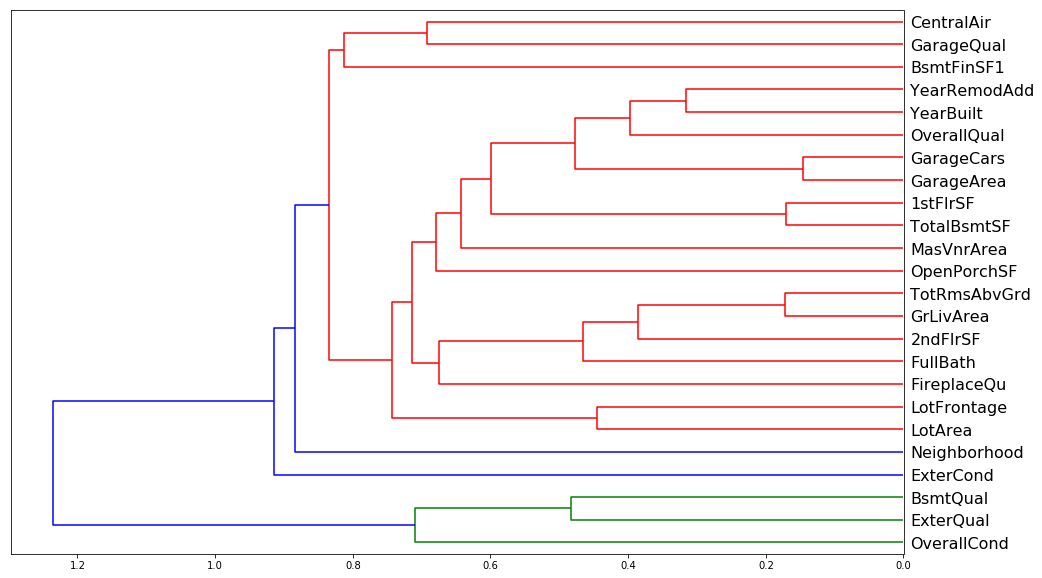

In [239]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendorgram = hc.dendrogram(z,labels = df_keep.columns, orientation = 'left', leaf_font_size=16)
plt.show()

This is quite interesting and reveals some links between variables.  For cxample it identifies the overlap between these variables, which is confirmed by their description.  
`YearBuilt` Original construction date.  
`YearRemodAdd` Remodel date (same as construction date if no remodeling or additions).

Try removing some of the related features to see if the model can be simplified without impacting the accuracy.

In [103]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators = 50, max_features = 0.5, n_jobs = -1, oob_score = True)
    x, _ = split_vals(df, n_trn)
    m.fit(x,y_train)
    return m.oob_score_

Baseline score.

In [245]:
get_oob(df_keep)

0.8434550295417095

Now remove each variable one at a time.

In [256]:
for c in ('CentralAir', 'GarageQual','BsmtFinSF1', 'YearRemodAdd', 'YearBuilt', 'OverallQual', 'GarageArea', 'GarageCars',
          '1stFlrSF','TotalBsmtSF', 'TotRmsAbvGrd','GrLivArea', 'LotFrontage','LotArea', 'GarageQual', 'BsmtQual', 'ExterQual'):
    print(c, get_oob(df_keep.drop(c, axis = 1)))

CentralAir 0.8420016694212571
GarageQual 0.8404423633467116
BsmtFinSF1 0.8347845137784118
YearRemodAdd 0.8423707087627337
YearBuilt 0.8454805452186995
OverallQual 0.831161928474708
GarageArea 0.8415894129904062
GarageCars 0.8411913989505699
1stFlrSF 0.845858713220579
TotalBsmtSF 0.8408019252102092
TotRmsAbvGrd 0.8483838196492093
GrLivArea 0.8392285641706793
LotFrontage 0.8394843294136112
LotArea 0.8410758135318704
GarageQual 0.8464706592279764
BsmtQual 0.8435369170260643
ExterQual 0.8421885978219341


Ok so it looks like we can drop `CentralAir`, `YearBuilt`, `GarageArea`, `TotalBsmtSF`, `TotRmsAbvGrd`, `LotFrontage`, and `ExterQual`.

In [264]:
to_drop = ['CentralAir', 'YearBuilt','GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'LotFrontage', 'ExterQual']
get_oob(df_keep.drop(to_drop, axis=1))

0.8464059608629076

Ok this looks good. Lets drop these from our dataframe.

In [265]:
df_keep.drop(to_drop, axis = 1 ,inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [266]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [267]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df[keep_cols]

Now lets re run our full model.

In [283]:
m = RandomForestRegressor(n_estimators = 50, max_features = 0.5, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 123 ms
##################################################
Results
log Root Mean Square Error Training Set: 0.0586
log Root Mean Square Error Validation Set: 0.141
R^2 Training Set: 0.98
R^2 Validation Set: 0.863
oob_score: 0.849
##################################################


In [271]:
X_train.shape

(730, 17)

In [112]:
X_train

,OverallQual,GrLivArea,1stFlrSF,GarageCars,BsmtFinSF1,GarageQual,LotArea,OverallCond,YearRemodAdd,FullBath,2ndFlrSF,Neighborhood,MSZoning,OpenPorchSF
0,7,1710,856,2,706,5,8450,5,2003,2,854,6,4,61
1,6,1262,1262,2,978,5,9600,8,1976,2,0,25,4,0
2,7,1786,920,2,486,5,11250,5,2002,2,866,6,4,42
3,7,1717,961,3,216,5,9550,5,1970,1,756,7,4,35
4,8,2198,1145,3,655,5,14260,5,2000,2,1053,16,4,84
5,5,1362,796,2,732,5,14115,5,1995,1,566,12,4,30
6,8,1694,1694,2,1369,5,10084,5,2005,2,0,22,4,57
7,7,2090,1107,2,859,5,10382,6,1973,2,983,15,4,204
8,7,1774,1022,2,0,2,6120,5,1950,2,752,18,5,0
9,5,1077,1077,1,851,3,7420,6,1950,1,0,4,4,4


# Partial Dependence

Find out, for the features that are important, how they relate to the dependent variable.

In [113]:
fi = rf_feat_importance(m, df_keep);

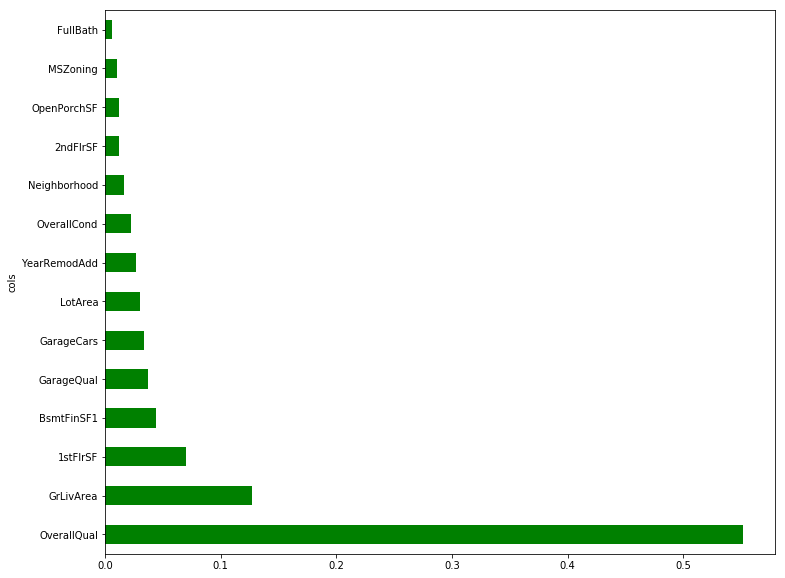

In [114]:
fi[:30].plot('cols', 'imp', 'barh', figsize = (12,10), legend = False, color='g')

# TBC

# Max Features

In [195]:
max_features_vals = np.linspace(0.1,1,100)
max_features_score = []
for i in max_features_vals:
    m = RandomForestRegressor(n_estimators = 40, max_features = i, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    max_features_score.append(m.score(X_valid, y_valid))

Text(0.5, 0, 'max_features')

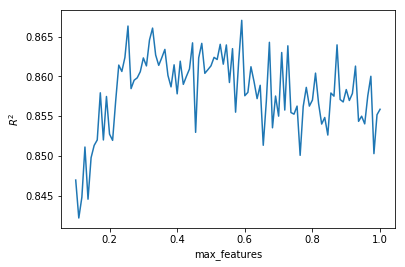

In [196]:
plt.plot(max_features_vals,max_features_score)
plt.ylabel('$R^2$')
plt.xlabel('max_features')

In [291]:
m = RandomForestRegressor(n_estimators = 100000, max_features = 0.5, n_jobs=-1, oob_score=True)
%time  m.fit(X_train, y_train)
print_score(m)

Wall time: 1min 8s
##################################################
Results
log Root Mean Square Error Training Set: 0.0567
log Root Mean Square Error Validation Set: 0.141
R^2 Training Set: 0.981
R^2 Validation Set: 0.863
oob_score: 0.863
##################################################


In [292]:
df_test_raw = pd.read_csv(f'{PATH}test.csv', low_memory=False)

In [293]:
train_cats(df_test_raw)

In [294]:
display_all(df_test_raw.head().T)

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [295]:
df_test, _, _ = proc_df(df_test_raw,na_dict=nas)

In [296]:
df_test_keep = df_test[keep_cols]

In [297]:
kaggle_preds = m.predict(df_test_keep)
kaggle_preds = np.exp(kaggle_preds)
kaggle_preds.shape

(1459,)

In [298]:
submission = pd.DataFrame({'Id': df_test_raw.Id, 'SalePrice': kaggle_preds})
submission.head()

,Id,SalePrice
0,1461,117590.863811
1,1462,144731.716734
2,1463,176412.462984
3,1464,169990.954188
4,1465,190737.047763


In [299]:
filename = 'HP-RF-003.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: HP-RF-003.csv
